In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({'font.size': 22})

In [4]:
folder = Path("../../../Slides")

In [5]:
cross_paths =  [path for path in Path("../../../Slides").glob("*.csv") if "Vs" in path.name and "Ablation" not in path.name]
cross_paths

[WindowsPath('../../../Slides/CatVsCat.csv'),
 WindowsPath('../../../Slides/CatVsEquine.csv'),
 WindowsPath('../../../Slides/CatVsHuman.csv'),
 WindowsPath('../../../Slides/EquineVsCat.csv'),
 WindowsPath('../../../Slides/EquineVsEquine.csv'),
 WindowsPath('../../../Slides/EquineVsHuman.csv'),
 WindowsPath('../../../Slides/HumanVsCat.csv'),
 WindowsPath('../../../Slides/HumanVsEquine.csv'),
 WindowsPath('../../../Slides/HumanVsHuman.csv')]

In [6]:
cross_frames = []
cross_compact = []

for path in cross_paths:
    
    df = pd.read_csv(path, delimiter=",") #, skiprows = 1 
    df["type"] = path.stem
    df["Source"] = path.stem.split("Vs")[0]
    df["Target"] = path.stem.split("Vs")[1]
    
    pascal_voc_metric_by_distance = df["pascal_voc_metric_by_distance"].max()
    
    cross_compact.append([path.stem.split("Vs")[0], path.stem.split("Vs")[1], pascal_voc_metric_by_distance])
    
    cross_frames.append(df)
    
cross_compact = pd.DataFrame(cross_compact, columns=["Source", "Target", "metric"])
    
crossDF = pd.concat(cross_frames)
crossDF

,epoch,train_loss,valid_loss,pascal_voc_metric_by_distance,BBloss,focal_loss,AP-0,AP-1,time,type,Source,Target
0,0,0.428803,0.327431,0.724780,0.096456,0.230975,0.607541,0.842020,09:18,CatVsCat,Cat,Cat
1,1,0.259290,0.330723,0.781514,0.097306,0.233417,0.744097,0.818930,08:26,CatVsCat,Cat,Cat
2,2,0.212581,0.222953,0.839327,0.066687,0.156265,0.863478,0.815176,09:42,CatVsCat,Cat,Cat
3,3,0.192643,0.191697,0.856216,0.058623,0.133074,0.884412,0.828020,10:14,CatVsCat,Cat,Cat
4,4,0.186401,0.200996,0.855386,0.063505,0.137492,0.838445,0.872328,08:57,CatVsCat,Cat,Cat
...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.207217,0.292990,0.795691,0.064421,0.228569,0.699463,0.891918,12:10,HumanVsHuman,Human,Human
6,6,0.181114,0.213240,0.847660,0.054887,0.158353,0.779297,0.916022,12:18,HumanVsHuman,Human,Human
7,7,0.158321,0.161517,0.901084,0.050381,0.111136,0.890766,0.911403,12:51,HumanVsHuman,Human,Human
8,8,0.147808,0.165625,0.898285,0.048040,0.117585,0.875577,0.920993,12:17,HumanVsHuman,Human,Human


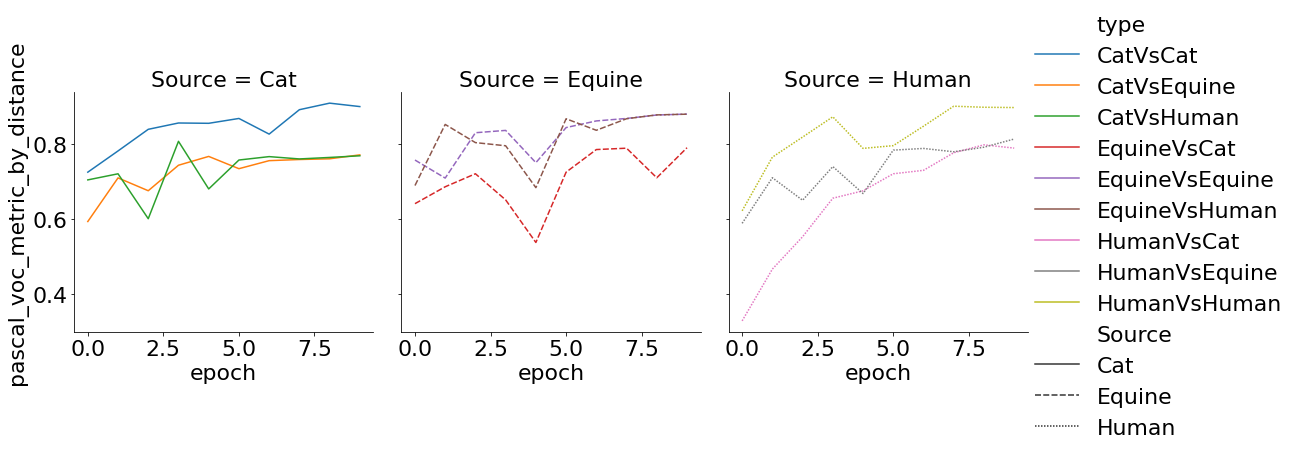

In [7]:
sns.relplot(x="epoch", y="pascal_voc_metric_by_distance",
             hue="type", style="Source", col="Source", kind="line",
             data=crossDF)

In [8]:
cross_compact

,Source,Target,metric
0,Cat,Cat,0.909271
1,Cat,Equine,0.771022
2,Cat,Human,0.807203
3,Equine,Cat,0.790111
4,Equine,Equine,0.879980
5,Equine,Human,0.879764
6,Human,Cat,0.797834
7,Human,Equine,0.813321
8,Human,Human,0.901084


<AxesSubplot:xlabel='Target', ylabel='Source'>

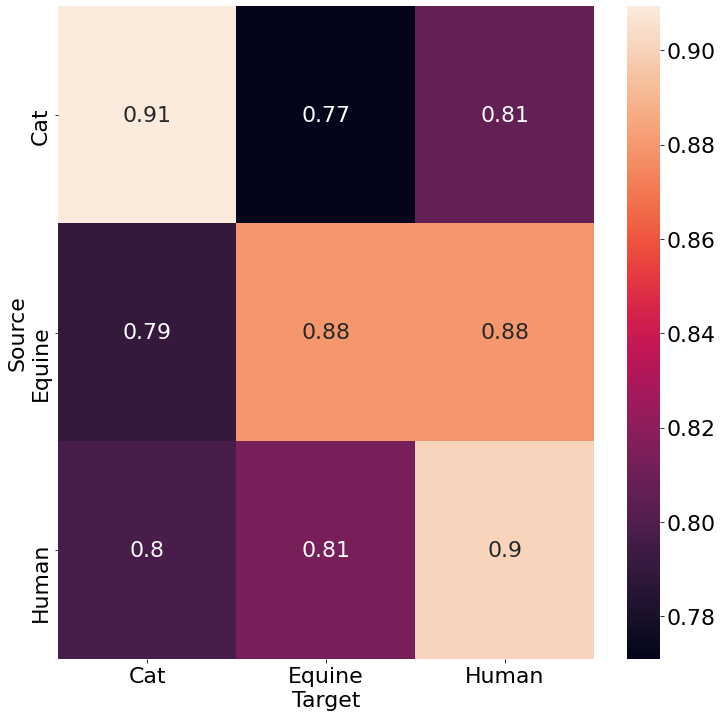

In [9]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(cross_compact.pivot("Source", "Target", "metric"), annot=True, ax=ax) # , fmt="d"